In [1]:
import numpy as np
from pyParkO import Interface2Gravity

In [2]:
# Read data (the data from Crust 1.0)
interface_depth = np.loadtxt('interface_depth.csv', delimiter=',')
# The reference depth of the density interface
reference_depth = np.mean(-interface_depth)
# the undulations of the density interface
delta_bnd = -interface_depth - reference_depth
# The initial density contrast for the density interface
delta_sigma = 1.85
# The attenuation factor of density contrast for the interface
mu = 0.022
# A numerical value representing the spherical distance (in kilometers) of the ocean area being studied along the meridional direction
longrkm = 1111.949
# A numerical value representing the spherical distance (in kilometers) of the ocean area being studied along the vertical direction
longckm = 1007.539

In [3]:
parameters = {
    "delta_bnd": delta_bnd,
    "delta_sigma": delta_sigma,
    "mu": mu,
    "reference_depth": reference_depth,
    "longrkm": longrkm, 
    "longckm": longckm, 
}

In [4]:
mf = Interface2Gravity(**parameters)
vgg = mf.forward(t=8)

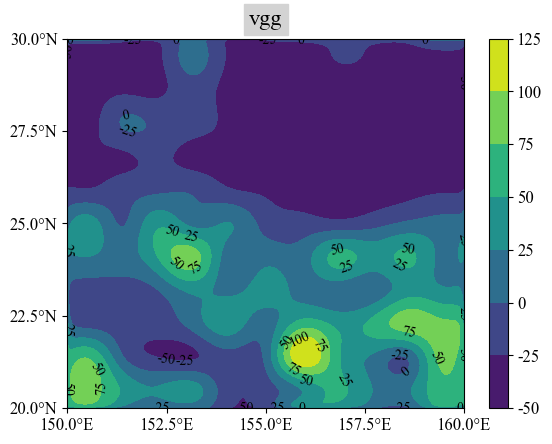

In [5]:
from pyParkO import ptr
x_ticks = ['150.0°E', '152.5°E', '155.0°E', '157.5°E', '160.0°E']
y_ticks = ['20.0°N', '22.5°N', '25.0°N', '27.5°N', '30.0°N']
ptr.plt_conterf(vgg, x_ticks, y_ticks, colorbar="vertical", title='vgg')

In [6]:
from pyParkO import Gravity2Interface

In [7]:
wh = 0.45
alpha = 8

parameters = {
    "vgg": vgg,
    "delta_sigma": delta_sigma,
    "mu": mu,
    "reference_depth": reference_depth,
    "longrkm": longrkm,
    "longckm": longckm,
    "wh": wh,
    "alpha": alpha,
}

In [8]:
# inverse modelling
mi = Gravity2Interface(**parameters)
inverse_topography = mi.downward(t=8)

In [9]:
def shrink_edge(data, n_col, m_row, n_col_l, m_row_l):
    m_left = int(np.floor((n_col_l - n_col) / 2))
    m_up = int(np.floor((m_row_l - m_row) / 2))
    data_shrink = data[m_up + 1:m_up + 1 + m_row, m_left + 1:m_left + 1 + n_col]
    return data_shrink

true_topography = shrink_edge(interface_depth, 541, 541, 601, 601)
inverse_topography = shrink_edge(inverse_topography, 541, 541, 601, 601)

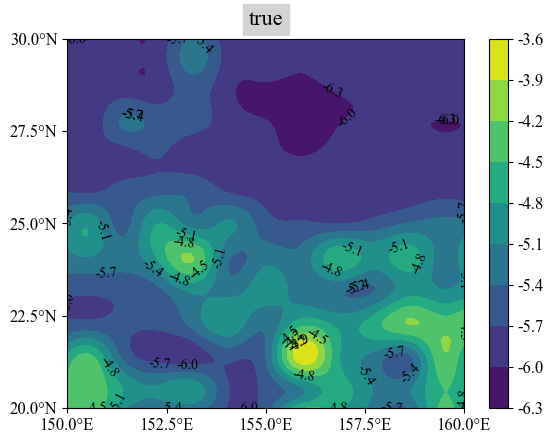

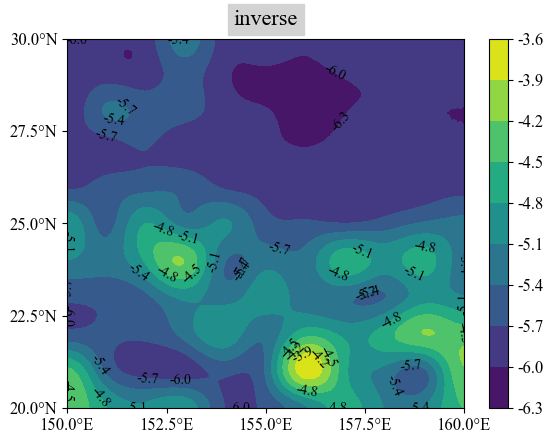

In [10]:
# Visualize 2-D contour map
ptr.plt_conterf(interface_depth, x_ticks, y_ticks, colorbar="vertical", title="true")
ptr.plt_conterf(inverse_topography, x_ticks, y_ticks, colorbar="vertical", title="inverse")

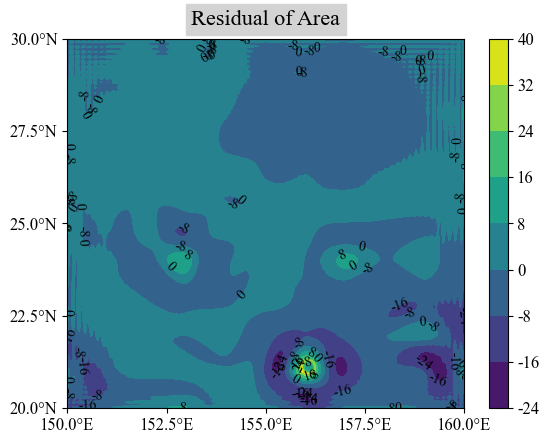

In [11]:
ptr.plt_conterf((true_topography-inverse_topography)*1000, x_ticks, y_ticks, colorbar="vertical", title=f"Residual of Area")